In [58]:
import matplotlib.pyplot as plt
import numpy as np
import ticktack
from ticktack import fitting
import os
from matplotlib.lines import Line2D
import matplotlib as mpl
import seaborn as sns
mpl.style.use('seaborn-colorblind')
colours = (plt.rcParams['axes.prop_cycle'].by_key()['color'])


In [2]:
def arrival_solar(start, phi):
    rel_time = start - (np.round(start / 11) * 11 + 11/4 - phi)
    rel_time[rel_time > 11/2] = rel_time[rel_time > 11/2] - 11
    rel_time[rel_time < -11/2] = rel_time[rel_time < -11/2] + 11
    return rel_time

In [114]:
def arrival_solar2(start, phi):
    return (start + phi  + 11/4) % 11

def arrival_solar3(start, phi):
    return (start + phi) % 11

In [115]:
chain = np.load("chain/5410BCE_Brehm21.npy")

In [116]:
arrival_solar(chain[:, 1], chain[:, 3])

array([ 0.28013799,  0.08445345,  0.29225762, ..., -0.45288522,
        0.19336942, -0.02097966])

In [117]:
arrival_solar2(chain[:, 1], chain[:, 3])

array([5.78013799, 5.58445345, 5.79225762, ..., 5.04711478, 5.69336942,
       5.47902034])

In [153]:
events = ["775AD-late-N", "993AD", "5410BCE"]
titles = ["775CE", "993CE", "5410BCE"]
cbm_models = ["Guttler14", "Buntgen18", "Brehm21",]
cbm_names = ["Güttler et al, 2015: 11-box", "Büntgen et al, 2018: 22-box", "Brehm et al, 2021: 22-box"]
colors = ['#0072B2', '#009E73', '#D55E00', '#CC79A7', '#e41a1c', '#56B4E9', '#999999', ]

In [154]:
Guttler14 = np.zeros((12000, 3))
Buntgen18 = np.zeros((12000, 3))
Brehm21 = np.zeros((12000, 3))

for i, event in enumerate(events):
    chain = np.load("chain/{}_Guttler14.npy".format(event))
    Guttler14[:, i] = arrival_solar2(chain[:, 1], chain[:, 3])
for i, event in enumerate(events):
    chain = np.load("chain/{}_Buntgen18.npy".format(event))
    Buntgen18[:, i] = arrival_solar2(chain[:, 1], chain[:, 3])
for i, event in enumerate(events):
    chain = np.load("chain/{}_Brehm21.npy".format(event))
    Brehm21[:, i] = arrival_solar2(chain[:, 1], chain[:, 3])

In [155]:
events

['775AD-late-N', '993AD', '5410BCE']

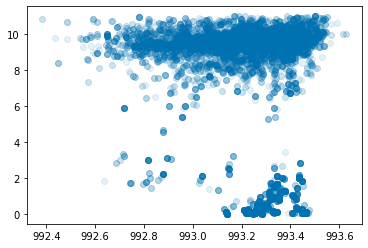

In [156]:
event = events[1]
chain = np.load("chain/{}_Brehm21.npy".format(event))

plt.scatter(chain[:,1],chain[:,3],alpha=0.1)

In [157]:
def remap_year(year):
    return ((year+11/2.) % 11)-11/2.

def remap_arbitrary(year,start):
    return ((year-start) % 11) + start

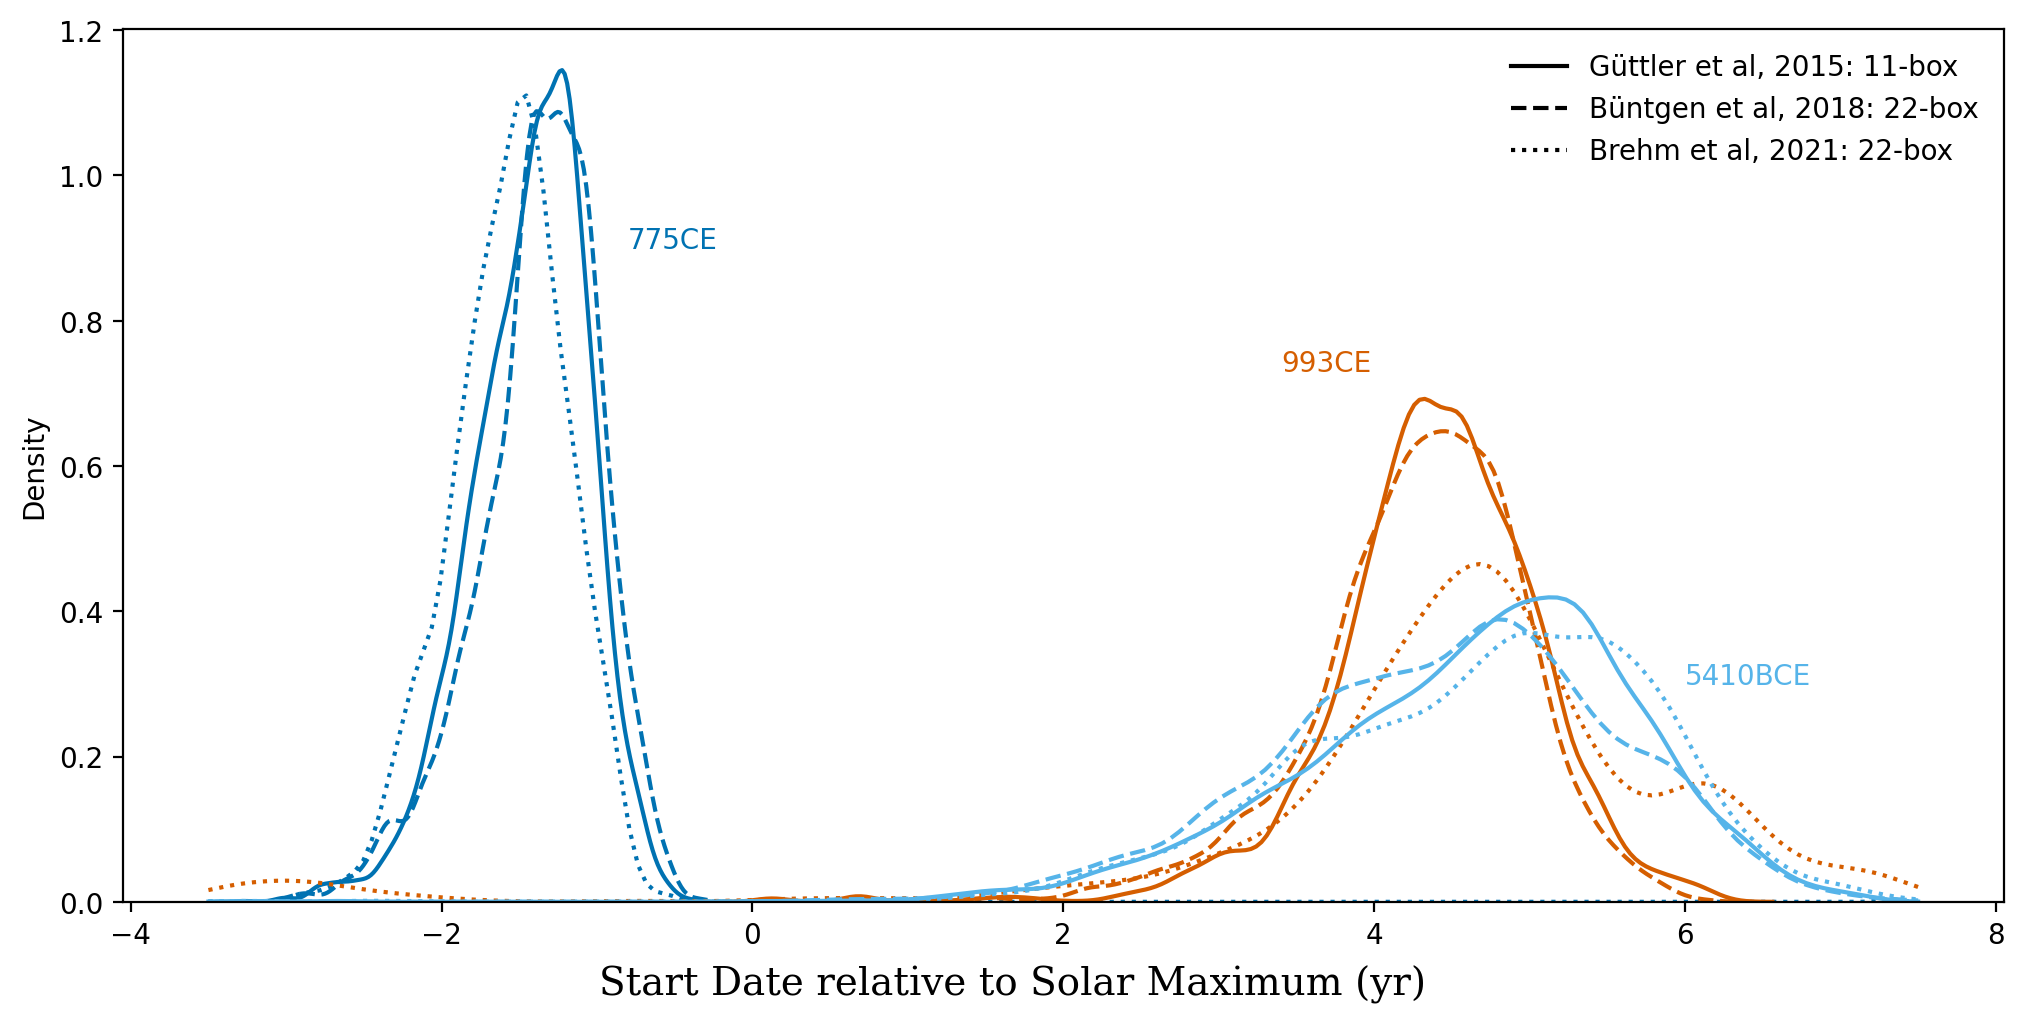

In [162]:
fmt = ["-", "--", ":"]
custom_lines = [Line2D([0], [0], ls=fmt[i], color="k", lw=1.5, label=cbm_names[i]) for i in range(len(cbm_names))]
fig = plt.figure(figsize=(10, 5), dpi=200, constrained_layout=True)
spec = fig.add_gridspec(ncols=1, nrows=1)
ax = fig.add_subplot(spec[0, 0])
colors = ['#0072B2', '#D55E00', '#56B4E9']
start = -11/2+2
for i in range(len(events)):
    sns.kdeplot(remap_arbitrary(Guttler14[:, i],start), ls=fmt[0], color=colors[i], ax=ax, clip=(start, start+11)); 
    sns.kdeplot(remap_arbitrary(Buntgen18[:, i],start), ls=fmt[1], color=colors[i], ax=ax, clip=(start, start+11)); 
    sns.kdeplot(remap_arbitrary(Brehm21[:, i],start), ls=fmt[2], color=colors[i], ax=ax, clip=(start, start+11));
ax.legend(handles=custom_lines, frameon=False, fontsize=10, loc="upper right");
# ax.axes.yaxis.set_visible(False)

plt.text(x=-0.8, y=0.9, s=titles[0], color=colors[0])
plt.text(x=3.4, y=0.73, s=titles[1], color=colors[1])
plt.text(x=6, y=0.3, s=titles[2], color=colors[2])

# plt.axvline(11/2)
fig.supxlabel("Start Date relative to Solar Maximum (yr)", 
              fontsize=14, fontfamily="serif", fontweight="roman");
fig.savefig("solar_cycle_density.pdf",bbox_inches='tight')
fig.savefig("solar_cycle_density.png",bbox_inches='tight')

In [53]:
def curve(t, phase):
    return 1.8 + 0.18 * 1.8 * np.sin(
            2 * np.pi / 11 * t + phase * 2 * np.pi / 11)

['775AD-late-N', '993AD', '5410BCE']

775AD-late-N
993AD
5410BCE


Text(0.5, 1.0, '5410 BC')

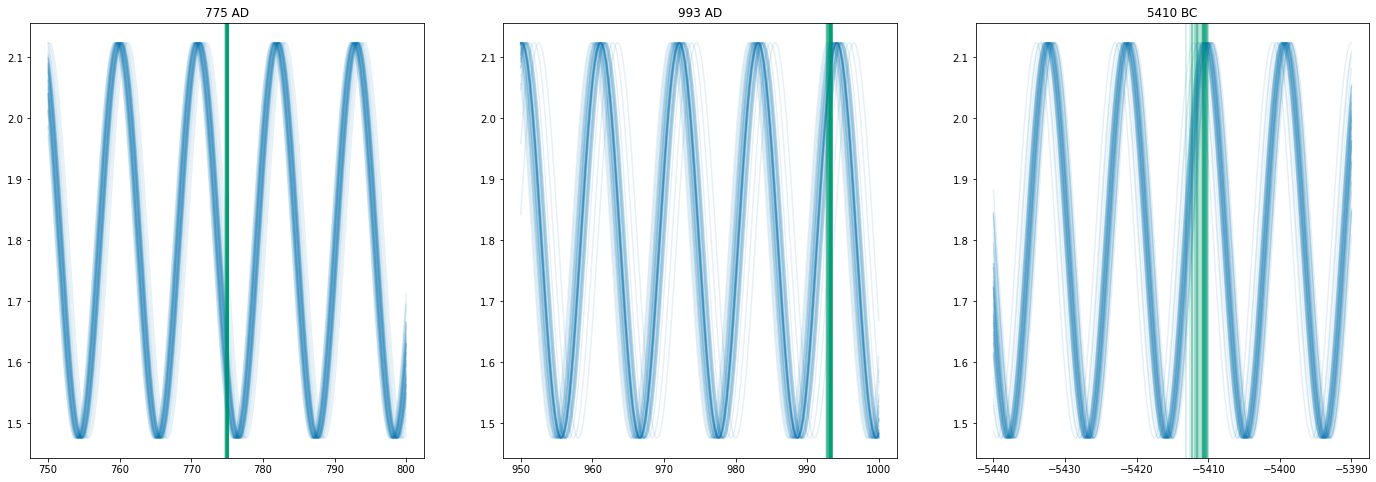

In [152]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(24,8.0))

event = events[0]

chain = np.load("chain/{}_Guttler14.npy".format(event))
print(event)


t = np.linspace(750,800,1000)
nchoice = 50
indices = np.random.choice(np.arange(chain.shape[0],dtype=int),size=nchoice)
phases = chain[indices,3]
timings = chain[indices,1]

for j, phase in enumerate(phases):
    ax1.plot(t,curve(t,phase),color=colours[0],alpha=0.1)
    ax1.axvline(timings[j],alpha=0.2,color=colours[1])
ax1.set_title('775 AD')

event = events[1]

chain = np.load("chain/{}_Guttler14.npy".format(event))
print(event)


t = np.linspace(950,1000,1000)
nchoice = 50
indices = np.random.choice(np.arange(chain.shape[0],dtype=int),size=nchoice)
phases = chain[indices,3]
timings = chain[indices,1]

for j, phase in enumerate(phases):
    ax2.plot(t,curve(t,phase),color=colours[0],alpha=0.1)
    ax2.axvline(timings[j],alpha=0.2,color=colours[1])
ax2.set_title('993 AD')

event = events[2]
print(event)

chain = np.load("chain/{}_Guttler14.npy".format(event))


t = np.linspace(-5440,-5390,1000)
nchoice = 50
indices = np.random.choice(np.arange(chain.shape[0],dtype=int),size=nchoice)
phases = chain[indices,3]
timings = chain[indices,1]

for j, phase in enumerate(phases):
    ax3.plot(t,curve(t,phase),color=colours[0],alpha=0.1)
    ax3.axvline(timings[j],alpha=0.2,color=colours[1])
    
ax3.set_title('5410 BC')


In [69]:
indices

array([ 1341,  8205,  5232,  1119,  1750,  5814,  1006,  2873, 10044,
        7591,  3942, 11283,  4103,  9736,  6959,  3237,  5179,  2300,
        4180,  9765,   511,  8397,  9396,  8586,  1866,  6892,   607,
        5488,  5323,   895,  7896,  2169,  1511,  9180,  6309, 10410,
         720,  9200,  3071,  8401,  7268,  2976,   231,  6837,  5389,
        1097,    97,  5637,  1094, 11208])

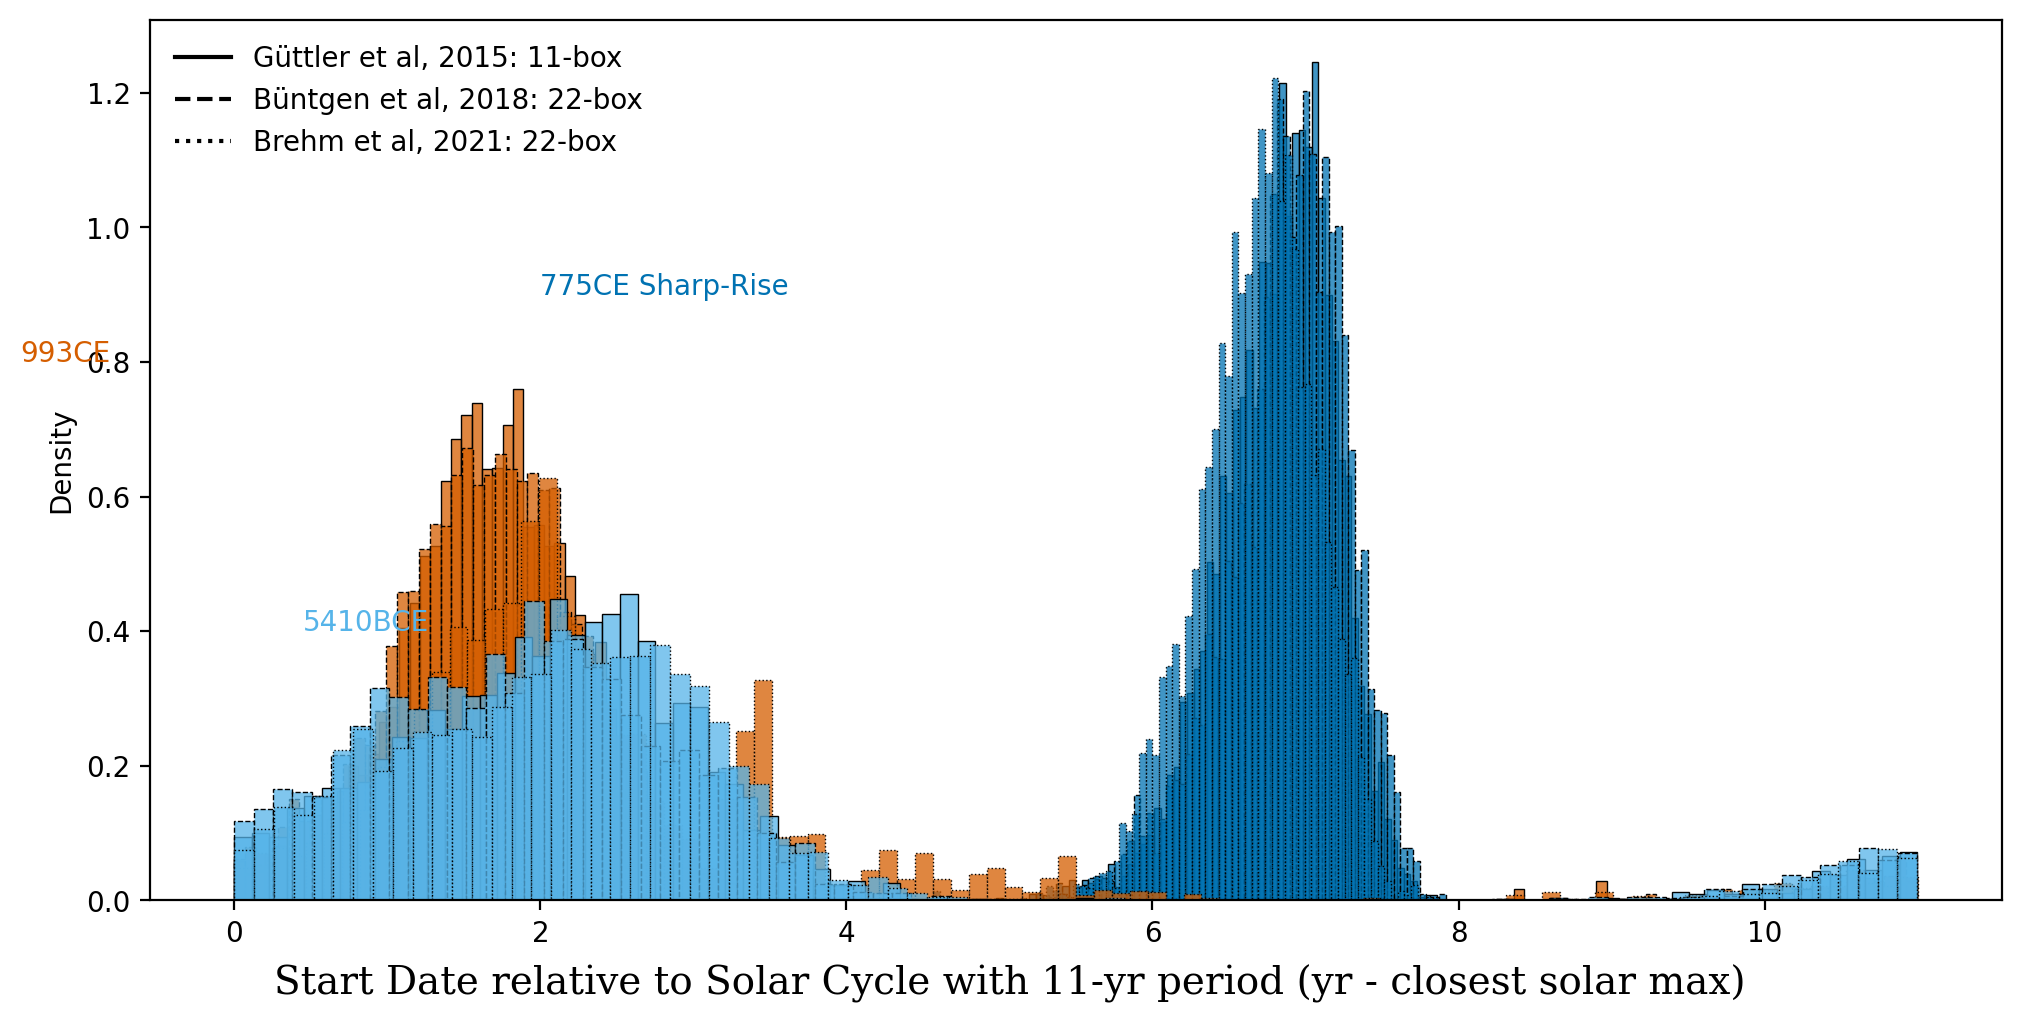

In [16]:
fmt = ["-", "--", ":"]
custom_lines = [Line2D([0], [0], ls=fmt[i], color="k", lw=1.5, label=cbm_names[i]) for i in range(len(cbm_names))]
fig = plt.figure(figsize=(10, 5), dpi=200, constrained_layout=True)
spec = fig.add_gridspec(ncols=1, nrows=1)
ax = fig.add_subplot(spec[0, 0])
colors = ['#0072B2', '#D55E00', '#56B4E9']
for i in range(len(events)):
    sns.histplot(Guttler14[:, i], ls=fmt[0], lw=0.5, color=colors[i], ax=ax, stat="density",); 
    sns.histplot(Buntgen18[:, i], ls=fmt[1], lw=0.5, color=colors[i], ax=ax, stat="density",); 
    sns.histplot(Brehm21[:, i], ls=fmt[2], lw=0.5, color=colors[i], ax=ax, stat="density",);
ax.legend(handles=custom_lines, frameon=False, fontsize=10, loc="upper left");
# ax.axes.yaxis.set_visible(False)

plt.text(x=2, y=0.9, s=titles[0], color=colors[0])
plt.text(x=-1.4, y=0.8, s=titles[1], color=colors[1])
plt.text(x=0.45, y=0.4, s=titles[2], color=colors[2])


fig.supxlabel("Start Date relative to Solar Cycle with 11-yr period (yr - closest solar max)", 
              fontsize=14, fontfamily="serif", fontweight="roman");
fig.savefig("solar_cycle_histogram.jpg")

In [91]:
Guttler14 = np.zeros((12000, 7))
Buntgen18 = np.zeros((12000, 7))
Brehm21 = np.zeros((12000, 7))

for i, event in enumerate(events):
    chain = np.load("chain/{}_Guttler14.npy".format(event))
    Guttler14[:, i] = chain[:, -1]
for i, event in enumerate(events):
    chain = np.load("chain/{}_Buntgen18.npy".format(event))
    Buntgen18[:, i] = chain[:, -1]
for i, event in enumerate(events):
    chain = np.load("chain/{}_Brehm21.npy".format(event))
    Brehm21[:, i] = chain[:, -1]

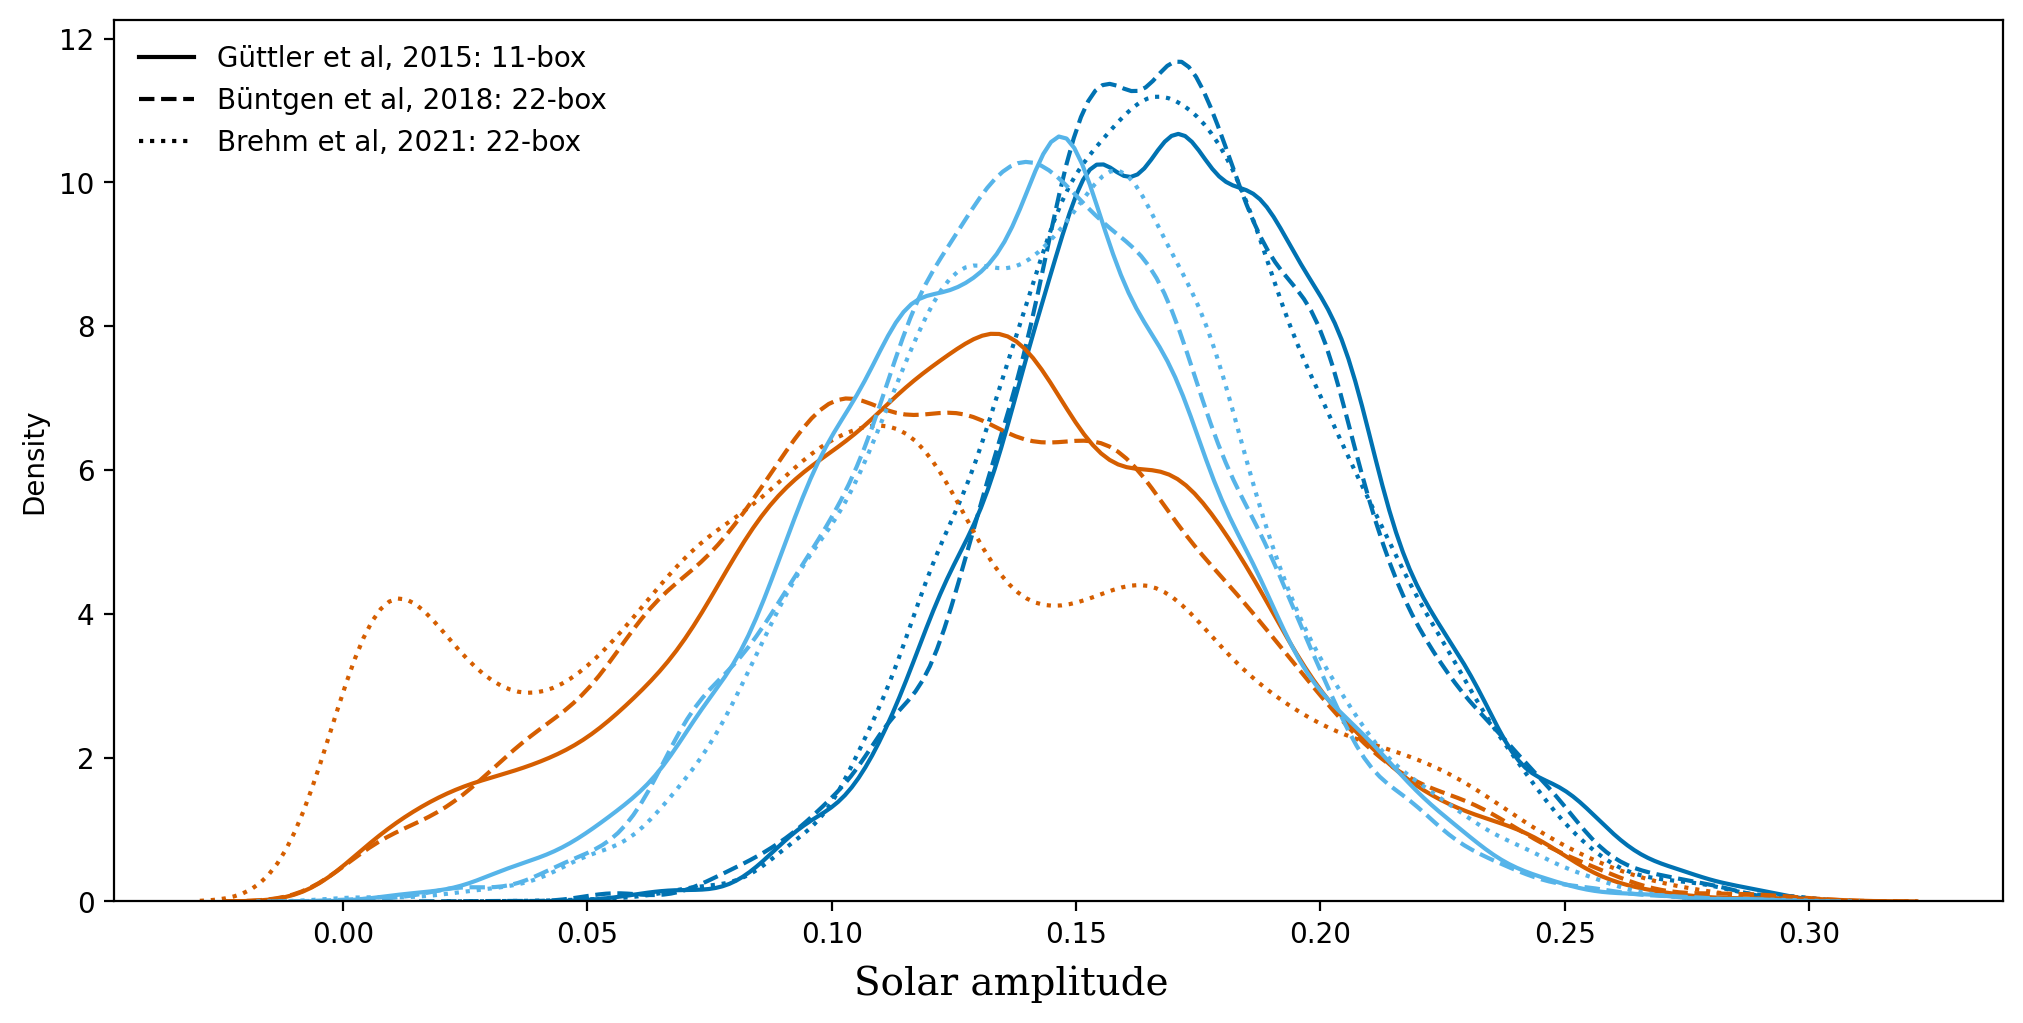

In [100]:
fmt = ["-", "--", ":"]
custom_lines = [Line2D([0], [0], ls=fmt[i], color="k", lw=1.5, label=cbm_names[i]) for i in range(len(cbm_names))]
fig = plt.figure(figsize=(10, 5), dpi=200, constrained_layout=True)
spec = fig.add_gridspec(ncols=1, nrows=1)
ax = fig.add_subplot(spec[0, 0])
for i in range(0, 3):
    sns.kdeplot(Guttler14[:, i], ls=fmt[0], color=colors[i], ax=ax); 
    sns.kdeplot(Buntgen18[:, i], ls=fmt[1], color=colors[i], ax=ax); 
    sns.kdeplot(Brehm21[:, i], ls=fmt[2], color=colors[i], ax=ax);
ax.legend(handles=custom_lines, frameon=False, fontsize=10, loc="upper left");


fig.supxlabel("Solar amplitude", 
              fontsize=14, fontfamily="serif", fontweight="roman");

In [99]:
events[i]

'993AD'